In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np

In [6]:
Directory_train = '/Users/rez/Documents/Engineering/Coding/VsCode/classification-challenge/classification-challenge-starter/Covid19-dataset/train'
Directory_test = '/Users/rez/Documents/Engineering/Coding/VsCode/classification-challenge/classification-challenge-solution/Covid19-dataset/test'
ClassMode = 'categorical'
ColorMode = 'grayscale'
TargetSize = (256, 256)
BatchSize = 8

IDG = ImageDataGenerator(
    rescale= 1./255,
    zoom_range =0.1,
    rotation_range = 25,
    width_shift_range = 0.05,
    height_shift_range = 0.05
)

Validation_DG = ImageDataGenerator()

training_iterator = IDG.flow_from_directory(Directory_train, class_mode= 'categorical', color_mode='grayscale', target_size=(256, 256), batch_size=BatchSize)

training_iterator.next()
print("\nLoading validation data...\n")

validation_iterator = Validation_DG.flow_from_directory(Directory_test, class_mode= ClassMode, color_mode=ColorMode, target_size=TargetSize, batch_size=BatchSize)
print("\nBuilding model...\n")


Found 251 images belonging to 3 classes.

Loading validation data...

Found 66 images belonging to 3 classes.

Building model...



In [7]:
def design_model(training_iterator):

    model = Sequential()

    model.add(tf.keras.Input(shape=(256,256,1)))

    model.add(layers.Conv2D(5, 5, strides=3, activation="relu")) 
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.1))

    model.add(layers.Conv2D(3, 3, strides=1, activation="relu")) 
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Flatten())

    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()],)

    print(model.summary())

    return model

model = design_model(training_iterator)

es = EarlyStopping(monitor='val_auc', mode='min', verbose=1, patience=20)

history = model.fit(

    training_iterator,
    steps_per_epoch=training_iterator.samples/BatchSize, epochs=5,
    validation_data=validation_iterator,
    validation_steps=validation_iterator.samples/BatchSize,
    callbacks=[es]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 84, 84, 5)         130       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 42, 42, 5)         0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 42, 42, 5)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 40, 40, 3)         138       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 20, 20, 3)         0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 20, 20, 3)        

2023-05-28 18:17:26.012980: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


32/31 [==============================] - ETA: 0s - loss: 1.0781 - categorical_accuracy: 0.4382 - auc_1: 0.5873

2023-05-28 18:17:28.284456: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


31/31 [==============================] - 3s 75ms/step - loss: 1.0781 - categorical_accuracy: 0.4382 - auc_1: 0.5873 - val_loss: 32.4073 - val_categorical_accuracy: 0.4697 - val_auc_1: 0.6094
Epoch 2/5
32/31 [==============================] - ETA: 0s - loss: 0.9386 - categorical_accuracy: 0.5857 - auc_1: 0.7535WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,categorical_accuracy,auc_1,val_loss,val_categorical_accuracy,val_auc_1


31/31 [==============================] - 2s 66ms/step - loss: 0.9386 - categorical_accuracy: 0.5857 - auc_1: 0.7535 - val_loss: 46.0075 - val_categorical_accuracy: 0.6061 - val_auc_1: 0.7045
Epoch 3/5
32/31 [==============================] - ETA: 0s - loss: 0.8247 - categorical_accuracy: 0.6096 - auc_1: 0.8036WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,categorical_accuracy,auc_1,val_loss,val_categorical_accuracy,val_auc_1


31/31 [==============================] - 2s 65ms/step - loss: 0.8247 - categorical_accuracy: 0.6096 - auc_1: 0.8036 - val_loss: 54.0282 - val_categorical_accuracy: 0.5606 - val_auc_1: 0.6705
Epoch 4/5
32/31 [==============================] - ETA: 0s - loss: 0.6278 - categorical_accuracy: 0.7649 - auc_1: 0.9094WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,categorical_accuracy,auc_1,val_loss,val_categorical_accuracy,val_auc_1


31/31 [==============================] - 2s 66ms/step - loss: 0.6278 - categorical_accuracy: 0.7649 - auc_1: 0.9094 - val_loss: 46.2804 - val_categorical_accuracy: 0.7879 - val_auc_1: 0.8409
Epoch 5/5
32/31 [==============================] - ETA: 0s - loss: 0.5068 - categorical_accuracy: 0.8088 - auc_1: 0.9307WARNING:tensorflow:Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: loss,categorical_accuracy,auc_1,val_loss,val_categorical_accuracy,val_auc_1


31/31 [==============================] - 2s 66ms/step - loss: 0.5068 - categorical_accuracy: 0.8088 - auc_1: 0.9307 - val_loss: 49.9855 - val_categorical_accuracy: 0.7879 - val_auc_1: 0.8409


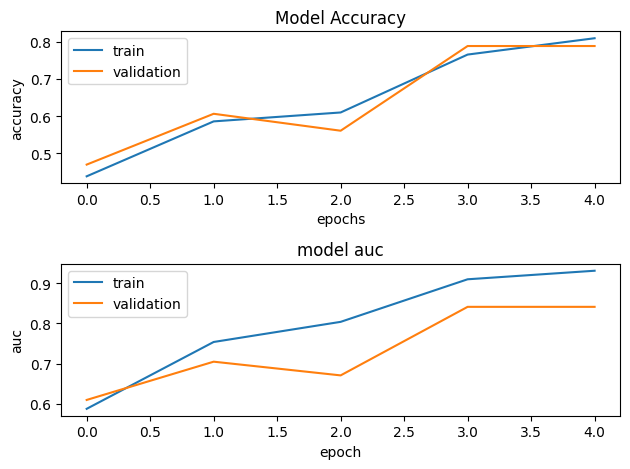

1/9 [==>...........................] - ETA: 1s

2023-05-28 18:18:10.105181: I tensorflow/core/common_runtime/executor.cc:1210] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


9/9 [==============================] - 0s 32ms/step
              precision    recall  f1-score   support

       Covid       0.41      0.42      0.42        26
      Normal       0.25      0.20      0.22        20
   Pneumonia       0.26      0.30      0.28        20

    accuracy                           0.32        66
   macro avg       0.31      0.31      0.31        66
weighted avg       0.32      0.32      0.32        66

[[11  7  8]
 [ 7  4  9]
 [ 9  5  6]]


In [9]:
#plotting the model's accuracy
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('Model Accuracy')
ax1.set_xlabel('epochs')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')
 
# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc_1'])
ax2.plot(history.history['val_auc_1'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')
 
# used to keep plots from overlapping
fig.tight_layout()
plt.show()

# %%
test_steps_per_epoch = np.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = np.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)   
 
cm=confusion_matrix(true_classes,predicted_classes)
print(cm)
